# Rotten Tomatoes movie review - Weekly Project

https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews

The Rotten Tomatoes movie review dataset is a corpus of movie reviews used for sentiment analysis

This competition presents a chance to benchmark your sentiment-analysis ideas on the Rotten Tomatoes dataset. You are asked to label phrases on a scale of five values: 
- negative 0
- somewhat negative 1
- neutral 2
- somewhat positive 3
- positive. 4

Obstacles like sentence negation, sarcasm, terseness, language ambiguity, and many others make this task very challenging.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')



[nltk_data] Downloading package stopwords to /home/david-
[nltk_data]     bui/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
from wordcloud import WordCloud

In [5]:
df = pd.read_csv('train.csv')
submit = pd.read_csv('submission.csv')

In [6]:
df.head()

,Unnamed: 0,PhraseId,SentenceId,Phrase,Sentiment
0,0,122,4,positively,3
1,1,19366,851,disguise the slack complacency of -LRB- Godard...,1
2,2,54763,2726,realizes a fullness that does not negate the s...,3
3,3,89708,4667,sealed,2
4,4,33494,1571,Go Where We Went 8 Movies Ago,3


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117045 entries, 0 to 117044
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  117045 non-null  int64 
 1   PhraseId    117045 non-null  int64 
 2   SentenceId  117045 non-null  int64 
 3   Phrase      117045 non-null  object
 4   Sentiment   117045 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 4.5+ MB


In [8]:
df.isnull().sum()

Unnamed: 0    0
PhraseId      0
SentenceId    0
Phrase        0
Sentiment     0
dtype: int64

In [9]:
df.drop(columns=['Unnamed: 0', 'PhraseId', 'SentenceId'], inplace=True)

In [10]:
df['Sentiment'].value_counts()

2    59605
3    24778
1    20563
4     6846
0     5253
Name: Sentiment, dtype: int64

<AxesSubplot:>

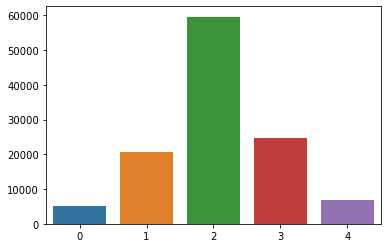

In [11]:
sns.barplot(df['Sentiment'].value_counts().index, df['Sentiment'].value_counts().values)

In [12]:
# word clould function
def wordcloud_by_sentiment(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords = stop_words,
    ).generate(str(data))
    return wordcloud


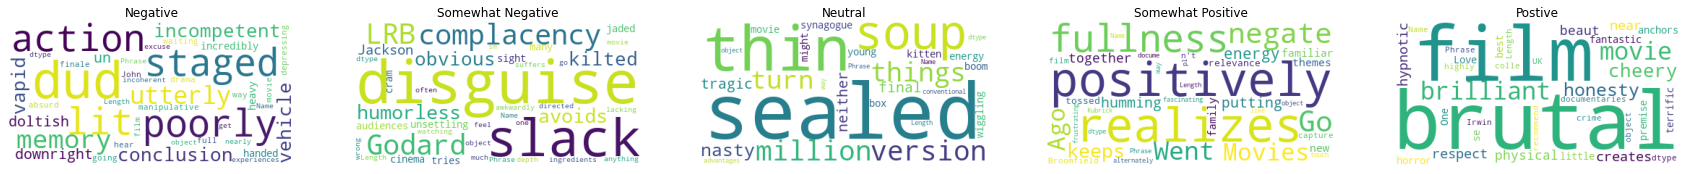

In [13]:
reviews = ['Negative', 'Somewhat Negative', 'Neutral', 'Somewhat Positive', 'Postive']

fig ,ax= plt.subplots(1,5, figsize=(30,15))

for i, value in enumerate(reviews):
    cloud = wordcloud_by_sentiment(df[df['Sentiment'] == i]['Phrase'])
    ax[i].set_title(value)
    ax[i].imshow(cloud)
    ax[i].axis('off')
plt.show()

In [14]:
import re 

def preprocessor(text):
    """ Return a cleaned version of text
    """
    # Remove HTML markup
    text = re.sub('<[^>]*>', '', text)
    # Save emoticons for later appending
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    # Remove any non-word character and append the emoticons,
    # Also Convert to lower case
    text = (re.sub('[\W]+', ' ', text.lower()) + ' ' + ' '.join(emoticons).replace('-', ''))
    
    return text

In [15]:
from nltk.stem import PorterStemmer

porter = PorterStemmer()

# Split a text into list of words and apply stemming technic
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]


In [16]:
from sklearn.model_selection import train_test_split

X = df['Phrase']
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=102)

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words=stop_words,
                        tokenizer=tokenizer_porter,
                        preprocessor=preprocessor)

clf = Pipeline([('vect', tfidf),
                ('clf', LogisticRegression(
                ))])

clf.fit(X_train, y_train)

Pipeline(steps=[('vect',
                 TfidfVectorizer(preprocessor=<function preprocessor at 0x7f24f682bc20>,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 tokenizer=<function tokenizer_porter at 0x7f24f682bcb0>)),
                ('clf', LogisticRegression(C=10000000000.0, random_state=0))])

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


predictions = clf.predict(X_test)
print('accuracy:',accuracy_score(y_test,predictions))
print('confusion matrix:\n',confusion_matrix(y_test,predictions))
print('classification report:\n',classification_report(y_test,predictions))

accuracy: 0.6299286599171259
confusion matrix:
 [[ 284  470  208   40    7]
 [ 254 1746 1830  240   16]
 [  78  921 9844 1044   78]
 [  14  175 2021 2395  377]
 [   4   17  202  667  477]]
classification report:
               precision    recall  f1-score   support

           0       0.45      0.28      0.35      1009
           1       0.52      0.43      0.47      4086
           2       0.70      0.82      0.76     11965
           3       0.55      0.48      0.51      4982
           4       0.50      0.35      0.41      1367

    accuracy                           0.63     23409
   macro avg       0.54      0.47      0.50     23409
weighted avg       0.61      0.63      0.62     23409



In [24]:
predictions = clf.predict(submit['Phrase'])
print('accuracy:',accuracy_score(submit['Sentiment'],predictions))
print('confusion matrix:\n',confusion_matrix(submit['Sentiment'],predictions))
print('classification report:\n',classification_report(submit['Sentiment'],predictions))

accuracy: 0.5985902857875176
confusion matrix:
 [[    0     0     0     0     0]
 [    0     0     0     0     0]
 [  950  5598 23354  7619  1494]
 [    0     0     0     0     0]
 [    0     0     0     0     0]]
classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       1.00      0.60      0.75     39015
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

    accuracy                           0.60     39015
   macro avg       0.20      0.12      0.15     39015
weighted avg       1.00      0.60      0.75     39015

